## Statistical Analysis of AES-128
#### Meenu Ahluwalia, Chris Boomhower, Steven Millett
This Jupyter Notebook contains the code used to implement our AES-128 bias analysis for MSDS7349

In [1]:
import base64
import hashlib
import pandas as pd
import numpy as np
import sys
import os
import bitarray
import math
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
%matplotlib inline

# To install pycrypto module, run following from command line in PuTTy:  python3 /usr/local/es7/bin/pip3 install --user pycrypto
from Crypto import Random
from Crypto.Cipher import AES
from Crypto.Util import Counter

## Ciphertext Generation

First, we configure our encryption and decryption functions for our analysis.

In [2]:
def encrypt(message, key, cipher_mode = 'CTR'):
    if cipher_mode == 'CBC': mode = AES.MODE_CBC
    elif cipher_mode == 'ECB': mode = AES.MODE_ECB
    else: mode = AES.MODE_CTR
    
    iv = 'This is our IV01'
    
    if cipher_mode != 'CTR': obj = AES.new(key, mode, iv)
    else:
        ctr = Counter.new(128)
        obj = AES.new(key, mode, counter=ctr)
    
    
    #obj = AES.new(key, mode, iv)
    ciphertext = obj.encrypt(message)
    return (base64.b64encode(ciphertext).decode())

def decrypt(ciphertext, key, cipher_mode = 'CTR'):
    if cipher_mode == 'CBC': mode = AES.MODE_CBC
    elif cipher_mode == 'ECB': mode = AES.MODE_ECB
    else: mode = AES.MODE_CTR
    
    iv = 'This is our IV01'
    
    if cipher_mode != 'CTR': obj = AES.new(key, mode, iv)
    else:
        ctr = Counter.new(128)
        obj = AES.new(key, mode, counter=ctr)
        
    #obj = AES.new(key, mode, iv)
    return (obj.decrypt(base64.b64decode(ciphertext)))

In [3]:
#test = encrypt('Secret message #', 'mysecretpassword', 'CBC')
#test

In [4]:
#decrypt(test, 'mysecretpassword', 'CBC')

In [5]:
#ba = bitarray.bitarray()
#ba.frombytes(test.encode('utf-8'))
#ba

Next, we generate our different forms of AES encrypted ciphertext. 100,000 plaintexts are encrypted using a shared secret password and initialization vector. The password and initialization vector are kept constant such as to act as control variables within our experiment design. Plaintexts, on the other hand, consist of leading zero integer values treated as 16 byte strings. For example, the first message is '0000000000000000', the second is '0000000000000001', the third is '0000000000000002', and so on. CBC, ECB, and CTR ciphertexts are appended to their respective lists for evaluation using the NIST Tests for Randomness.
###### CBC Ciphertexts

In [6]:
%%time
key = 'mysecretpassword'

CBC_list = []
for x, i in enumerate(range(0,100000)):
    CBC_list.append(encrypt(str(i).zfill(16), key, 'CBC'))

print'CBC_list length =', len(CBC_list)

CBC_dec_list = []
for crypto in CBC_list:
    CBC_dec_list.append(decrypt(crypto, key, 'CBC'))
    
print'CBC_dec_list length =', len(CBC_dec_list)

CBC_list length = 100000
CBC_dec_list length = 100000
Wall time: 2.91 s


Ensure CBC encryption functionality.

In [7]:
%%time
for crypto in CBC_list[:5]:
    print(crypto)
for msg in CBC_dec_list[:5]:
    print(msg)

DklbbT/PejHZvTCS8BsLEw==
kVQmaiRO65loXpFF9to67A==
27HN7dasHa0z4I6M5G9ZVQ==
KJaquaGVDi6zMtX7LlITaA==
uqFOUQ9++I/ELksiejukxQ==
0000000000000000
0000000000000001
0000000000000002
0000000000000003
0000000000000004
Wall time: 1e+03 µs


###### ECB Ciphertexts

In [8]:
%%time
key = 'mysecretpassword'

ECB_list = []
for x, i in enumerate(range(0,100000)):
    ECB_list.append(encrypt(str(i).zfill(16), key, 'ECB'))

print'ECB_list length =', len(ECB_list)

ECB_dec_list = []
for crypto in ECB_list:
    ECB_dec_list.append(decrypt(crypto, key, 'ECB'))
    
print'ECB_dec_list length =', len(ECB_dec_list)

ECB_list length = 100000
ECB_dec_list length = 100000
Wall time: 2.93 s


Ensure ECB encryption functionality.

In [9]:
%%time
for crypto in ECB_list[:5]:
    print(crypto)
for msg in ECB_dec_list[:5]:
    print(msg)

4KCUt/zHuL9pGT9yKJMZ6Q==
HzMEwaWa62Q8N5D2vu1RBA==
gHttXYC2Rf+ROO+9t4bN3Q==
ENtBVzOvJ8HYS5TN3hSKIQ==
HrrQFKqFPwz9DOyNCLWV/w==
0000000000000000
0000000000000001
0000000000000002
0000000000000003
0000000000000004
Wall time: 1e+03 µs


###### CTR Ciphertexts

In [10]:
%%time
key = 'mysecretpassword'

CTR_list = []
for x, i in enumerate(range(0,100000)):
    CTR_list.append(encrypt(str(i).zfill(16), key, 'CTR'))

print'CTR_list length =', len(CTR_list)

CTR_dec_list = []
for crypto in CTR_list:
    CTR_dec_list.append(decrypt(crypto, key, 'CTR'))
    
print'CTR_dec_list length =', len(CTR_dec_list)

CTR_list length = 100000
CTR_dec_list length = 100000
Wall time: 10.8 s


Ensure CTR encryption functionality.

In [11]:
%%time
for crypto in CTR_list[:5]:
    print(crypto)
for msg in CTR_dec_list[:5]:
    print(msg)

HoiZ3hVHRRG1k1kewwIrHQ==
HoiZ3hVHRRG1k1kewwIrHA==
HoiZ3hVHRRG1k1kewwIrHw==
HoiZ3hVHRRG1k1kewwIrHg==
HoiZ3hVHRRG1k1kewwIrGQ==
0000000000000000
0000000000000001
0000000000000002
0000000000000003
0000000000000004
Wall time: 6 ms


## Configure supporting library functions for sp800_22_tests python implementation
*Note: The sp800_22_tests NIST Tests for Randomness python implementation is an open licence library created by Github user dj-on-github and is hosted in the sp800_22_tests repo at https://github.com/dj-on-github/sp800_22_tests. Code from this library has been extracted and modified in order to produce our study.*

In [12]:
from math import gamma,e

# Continued Fraction Computation
# 6.5.31 Handbook of Mathematical Functions, page 263
#    Recursive implementation
def upper_incomplete_gamma(a,x,d=0,iterations=100):
    if d == iterations:
        if ((d % 2) == 1):
            return 1.0 # end iterations
        else:
            m = d/2
            return x + (m-a)
    if d == 0:
        result = ((x**a) * (e**(-x)))/upper_incomplete_gamma(a,x,d=d+1)
        return result
    elif ((d % 2) == 1):
        m = 1.0+((d-1.0)/2.0)
        return x+ ((m-a)/(upper_incomplete_gamma(a,x,d=d+1)))
    else:
        m = d/2
        return 1+(m/(upper_incomplete_gamma(a,x,d=d+1)))

# 6.5.31 Handbook of Mathematical Functions, page 263
#    Recursive implementation
def upper_incomplete_gamma2(a,x,d=0,iterations=100):
    if d == iterations:
        return 1.0 
    if d == 0:
        result = ((x**a) * (e**(-x)))/upper_incomplete_gamma2(a,x,d=d+1)
        return result
    else:
        m = (d*2)-1
        return (m-a)+x+ ((d*(a-d))/(upper_incomplete_gamma2(a,x,d=d+1)))

def lower_incomplete_gamma(a,x,d=0,iterations=100):
    if d == iterations:
        if ((d % 2) == 1):
            return 1.0 # end iterations
        else:
            m = d/2
            return x + (m-a)
    if d == 0:
        result = ((x**a) * (e**(-x)))/lower_incomplete_gamma(a,x,d=d+1)
        return result
    elif ((d % 2) == 1):
        m = d - 1
        n = (d-1.0)/2.0
        return a + m - (((a+n)*x)/lower_incomplete_gamma(a,x,d=d+1))
    else:
        m = d-1
        n = d/2.0
        return a+m+((n*x)/(lower_incomplete_gamma(a,x,d=d+1)))

def lower_incomplete_gamma2(a,x):
    return gamma(a)-upper_incomplete_gamma2(a,x)

def complimentary_incomplete_gamma(a,x):
    return 1.0-upper_incomplete_gamma(a,x)

# Scipy name mappings
def gammainc(a,x):
    return lower_incomplete_gamma(a,x)/gamma(a)

def gammaincc(a,x):
    return upper_incomplete_gamma(a,x)/gamma(a)
   


In [13]:
def count_ones_zeroes(bits):
    ones = 0
    zeroes = 0
    for bit in bits:
        if (bit == 1):
            ones += 1
        else:
            zeroes += 1
    return (zeroes,ones)

## Perform Tests for Randomness
In this section, we first process how many ones and how many zeroes are contained within each ciphertext contained within each ciphertext list, produced by each mode of AES operation above. We then apply each test to each ciphertext binary value for evaluation, and p-value results are stored for later review.

#### Monobit Testing

Configure test function

In [14]:
def monobit_test(bits):
    n = len(bits)
    
    zeroes,ones = count_ones_zeroes(bits)
    s = abs(ones-zeroes)
    print "  Ones count   = %d" % ones
    print "  Zeroes count = %d" % zeroes
    
    p = math.erfc(float(s)/(math.sqrt(float(n)) * math.sqrt(2.0)))
    
    success = (p >= 0.1)
    return (p,zeroes,ones)

Setup emtpy lists (Count lists only need to be generated during monobit testing... will be reused in other test dataframes that follow)

In [15]:
CBC_0Count = []
ECB_0Count = []
CTR_0Count = []
CBC_1Count = []
ECB_1Count = []
CTR_1Count = []

CBC_mono_pvals = []
ECB_mono_pvals = []
CTR_mono_pvals = []

Perform test.

In [16]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_mono_pvals.append(monobit_test(ba)[0])
        CBC_0Count.append(monobit_test(ba)[1])
        CBC_1Count.append(monobit_test(ba)[2])
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_mono_pvals.append(monobit_test(ba)[0])
        ECB_0Count.append(monobit_test(ba)[1])
        ECB_1Count.append(monobit_test(ba)[2])
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_mono_pvals.append(monobit_test(ba)[0])
        CTR_0Count.append(monobit_test(ba)[1])
        CTR_1Count.append(monobit_test(ba)[2])
    except: pass

Wall time: 59.7 s


Consolidate results into dataframes which will be added to in subsequent tests.

In [17]:
CBC_ciph = pd.Series(CBC_list, name='CBC_ciph')
mono_pval = pd.Series(CBC_mono_pvals, name='mono_pval')
CBC_0Count = pd.Series(CBC_0Count, name='CBC_0Count')
CBC_1Count = pd.Series(CBC_1Count, name='CBC_1Count')
CBC_df = pd.concat([CBC_ciph, CBC_0Count, CBC_1Count, mono_pval], axis=1)
CBC_df.CBC_0Count = CBC_df.CBC_0Count.astype(int)
CBC_df.CBC_1Count = CBC_df.CBC_1Count.astype(int)

display(CBC_df.describe())
display(CBC_df.tail())

,CBC_0Count,CBC_1Count,mono_pval
count,100000.00000,100000.00000,100000.000000
mean,98.63086,93.36914,0.574541
std,4.74178,4.74178,0.264417
min,76.00000,73.00000,0.000901
25%,95.00000,90.00000,0.386476
50%,99.00000,93.00000,0.563703
75%,102.00000,97.00000,0.772830
max,119.00000,116.00000,1.000000


,CBC_ciph,CBC_0Count,CBC_1Count,mono_pval
99995,TD4eFQgRU9T6tJ2quVXDwA==,105,87,0.193931
99996,pJeM6Vt+5MJDMAVrTePUOA==,105,87,0.193931
99997,+qnDp9N3il1BOwjzoarf6g==,93,99,0.665006
99998,QPtQyOxXNsGz6HQAjkZnDA==,102,90,0.386476
99999,jqOTs97A7UcfrY+0DeQerA==,100,92,0.563703


In [18]:
ECB_ciph = pd.Series(ECB_list, name='ECB_ciph')
mono_pval = pd.Series(ECB_mono_pvals, name='mono_pval')
ECB_0Count = pd.Series(ECB_0Count, name='ECB_0Count')
ECB_1Count = pd.Series(ECB_1Count, name='ECB_1Count')
ECB_df = pd.concat([ECB_ciph, ECB_0Count, ECB_1Count, mono_pval], axis=1)
ECB_df.ECB_0Count = ECB_df.ECB_0Count.astype(int)
ECB_df.ECB_1Count = ECB_df.ECB_1Count.astype(int)

display(ECB_df.describe())
display(ECB_df.tail())

,ECB_0Count,ECB_1Count,mono_pval
count,100000.000000,100000.000000,100000.000000
mean,98.584460,93.415540,0.576041
std,4.745397,4.745397,0.264399
min,76.000000,74.000000,0.001496
25%,95.000000,90.000000,0.386476
50%,99.000000,93.000000,0.563703
75%,102.000000,97.000000,0.772830
max,118.000000,116.000000,1.000000


,ECB_ciph,ECB_0Count,ECB_1Count,mono_pval
99995,ZYZBGCNARNyAQx1kzUf0kw==,100,92,0.563703
99996,80IvGZfszbfdy6pIWMg5Mg==,95,97,0.885234
99997,qL8UZHGqgP/bLY6+NQ+qdg==,101,91,0.470486
99998,dd88bfmOwex30JmMj6hd1w==,98,94,0.772830
99999,CJYXi4LNmLbj3xlzQyZtFQ==,101,91,0.470486


In [19]:
CTR_ciph = pd.Series(CTR_list, name='CTR_ciph')
mono_pval = pd.Series(CTR_mono_pvals, name='mono_pval')
CTR_0Count = pd.Series(CTR_0Count, name='CTR_0Count')
CTR_1Count = pd.Series(CTR_1Count, name='CTR_1Count')
CTR_df = pd.concat([CTR_ciph, CTR_0Count, CTR_1Count, mono_pval], axis=1)
CTR_df.CTR_0Count = CTR_df.CTR_0Count.astype(int)
CTR_df.CTR_1Count = CTR_df.CTR_1Count.astype(int)

display(CTR_df.describe())
display(CTR_df.tail())

,CTR_0Count,CTR_1Count,mono_pval
count,100000.000000,100000.000000,100000.000000
mean,99.100000,92.900000,0.631723
std,2.937701,2.937701,0.225039
min,88.000000,83.000000,0.060602
25%,97.000000,91.000000,0.470486
50%,99.000000,93.000000,0.665006
75%,101.000000,95.000000,0.772830
max,109.000000,104.000000,1.000000


,CTR_ciph,CTR_0Count,CTR_1Count,mono_pval
99995,HoiZ3hVHRRG1k1kXygsiGA==,99,93,0.665006
99996,HoiZ3hVHRRG1k1kXygsiGw==,95,97,0.885234
99997,HoiZ3hVHRRG1k1kXygsiGg==,96,96,1.000000
99998,HoiZ3hVHRRG1k1kXygsiFQ==,99,93,0.665006
99999,HoiZ3hVHRRG1k1kXygsiFA==,100,92,0.563703


#### frequency_within_block_test

Configure test function

In [20]:
import math
from fractions import Fraction
#from scipy.special import gamma, gammainc, gammaincc
#from gamma_functions import *

def frequency_within_block_test(bits):
    # Compute number of blocks M = block size. N=num of blocks
    # N = floor(n/M)
    # miniumum block size 20 bits, most blocks 100
    n = len(bits)
    M = 20
    N = int(math.floor(n/M))
    if N > 99:
        N=99
        M = int(math.floor(n/N))
    
    if len(bits) < 100:
        print "Too little data for test. Supply at least 100 bits"
        return FAIL,1.0,None
    
    print "  n = %d" % len(bits)
    print "  N = %d" % N
    print "  M = %d" % M
    
    num_of_blocks = N
    block_size = M #int(math.floor(len(bits)/num_of_blocks))
    #n = int(block_size * num_of_blocks)
    
    proportions = list()
    for i in xrange(num_of_blocks):
        block = bits[i*(block_size):((i+1)*(block_size))]
        zeroes,ones = count_ones_zeroes(block)
        proportions.append(Fraction(ones,block_size))

    chisq = 0.0
    for prop in proportions:
        chisq += 4.0*block_size*((prop - Fraction(1,2))**2)
    
    p = gammaincc((num_of_blocks/2.0),float(chisq)/2.0)
    success = (p >= 0.01)
    return (p)

Setup emtpy lists

In [21]:
CBC_FwB_pvals = []
ECB_FwB_pvals = []
CTR_FwB_pvals = []

Perform test.

In [22]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_FwB_pvals.append(frequency_within_block_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_FwB_pvals.append(frequency_within_block_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_FwB_pvals.append(frequency_within_block_test(ba))
    except: pass

Wall time: 3min 48s


In [23]:
def add2DF(df, pvals, name):
    pvalS = pd.Series(pvals, name=name)
    dfAdd = pd.concat([df, pvalS], axis=1)
    display(dfAdd.describe())
    display(dfAdd.tail())
    return(dfAdd)

In [24]:
CBC_df2 = add2DF(CBC_df, CBC_FwB_pvals, 'freqWithinBlock_pval')

,CBC_0Count,CBC_1Count,mono_pval,freqWithinBlock_pval
count,100000.00000,100000.00000,100000.000000,100000.000000
mean,98.63086,93.36914,0.574541,0.783510
std,4.74178,4.74178,0.264417,0.189767
min,76.00000,73.00000,0.000901,0.014550
25%,95.00000,90.00000,0.386476,0.678686
50%,99.00000,93.00000,0.563703,0.834308
75%,102.00000,97.00000,0.772830,0.935716
max,119.00000,116.00000,1.000000,1.000008


,CBC_ciph,CBC_0Count,CBC_1Count,mono_pval,freqWithinBlock_pval
99995,TD4eFQgRU9T6tJ2quVXDwA==,105,87,0.193931,0.678686
99996,pJeM6Vt+5MJDMAVrTePUOA==,105,87,0.193931,0.759756
99997,+qnDp9N3il1BOwjzoarf6g==,93,99,0.665006,0.401199
99998,QPtQyOxXNsGz6HQAjkZnDA==,102,90,0.386476,0.534146
99999,jqOTs97A7UcfrY+0DeQerA==,100,92,0.563703,0.779188


In [25]:
ECB_df2 = add2DF(ECB_df, ECB_FwB_pvals, 'freqWithinBlock_pval')

,ECB_0Count,ECB_1Count,mono_pval,freqWithinBlock_pval
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,98.584460,93.415540,0.576041,0.784410
std,4.745397,4.745397,0.264399,0.188427
min,76.000000,74.000000,0.001496,0.000000
25%,95.000000,90.000000,0.386476,0.678686
50%,99.000000,93.000000,0.563703,0.834308
75%,102.000000,97.000000,0.772830,0.935716
max,118.000000,116.000000,1.000000,1.000008


,ECB_ciph,ECB_0Count,ECB_1Count,mono_pval,freqWithinBlock_pval
99995,ZYZBGCNARNyAQx1kzUf0kw==,100,92,0.563703,0.657933
99996,80IvGZfszbfdy6pIWMg5Mg==,95,97,0.885234,0.834308
99997,qL8UZHGqgP/bLY6+NQ+qdg==,101,91,0.470486,0.994250
99998,dd88bfmOwex30JmMj6hd1w==,98,94,0.772830,0.574903
99999,CJYXi4LNmLbj3xlzQyZtFQ==,101,91,0.470486,0.897763


In [26]:
CTR_df2 = add2DF(CTR_df, CTR_FwB_pvals, 'freqWithinBlock_pval')

,CTR_0Count,CTR_1Count,mono_pval,freqWithinBlock_pval
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,99.100000,92.900000,0.631723,0.819270
std,2.937701,2.937701,0.225039,0.122282
min,88.000000,83.000000,0.060602,0.108791
25%,97.000000,91.000000,0.470486,0.759756
50%,99.000000,93.000000,0.665006,0.851383
75%,101.000000,95.000000,0.772830,0.911413
max,109.000000,104.000000,1.000000,0.964295


,CTR_ciph,CTR_0Count,CTR_1Count,mono_pval,freqWithinBlock_pval
99995,HoiZ3hVHRRG1k1kXygsiGA==,99,93,0.665006,0.867692
99996,HoiZ3hVHRRG1k1kXygsiGw==,95,97,0.885234,0.867692
99997,HoiZ3hVHRRG1k1kXygsiGg==,96,96,1.000000,0.911413
99998,HoiZ3hVHRRG1k1kXygsiFQ==,99,93,0.665006,0.867692
99999,HoiZ3hVHRRG1k1kXygsiFA==,100,92,0.563703,0.779188


#### The Runs Test

#### Tests for the Longest-Run-of-Ones in a Block

#### The Binary Matrix Rank Test

#### The Discrete Fourier Transform (Spectral) Test

#### The Non-overlapping Template Matching Test

#### The Overlapping Template Matching Test

#### Maurer's "Universal Statistical" Test

#### The Linear Complexity Test

#### The Serial Test

#### The Approximate Entropy Test

#### Cumulative Sums (Cusums) test

#### The Random Excursions Test

#### The Random Excursions Variant Test

## Graphical and statistical analysis of test results

In this section, we review the results of the various tests by each AES cipher mode. Comparisons are made between modes visually as well as via basic statical tests such as ANOVA. A final report of the number of passing encryptions for each AES mode is also given.

### Combine Data by Test

In [27]:
CBC = pd.DataFrame({'mono_pval':CBC_df2.mono_pval, 'Type':'CBC'})
ECB = pd.DataFrame({'mono_pval':ECB_df2.mono_pval, 'Type':'ECB'})
CTR = pd.DataFrame({'mono_pval':CTR_df2.mono_pval, 'Type':'CTR'})
mono_test = pd.concat([CBC,ECB,CTR])

CBC = pd.DataFrame({'freqWithinBlock_pval':CBC_df2.freqWithinBlock_pval, 'Type':'CBC'})
ECB = pd.DataFrame({'freqWithinBlock_pval':ECB_df2.freqWithinBlock_pval, 'Type':'ECB'})
CTR = pd.DataFrame({'freqWithinBlock_pval':CTR_df2.freqWithinBlock_pval, 'Type':'CTR'})
freqWithinBlock_test = pd.concat([CBC,ECB,CTR])

### Visual Review
In this section, we provide visual review of the different distributions of p-values for each test by AES encryption type.

#### Monobit Test

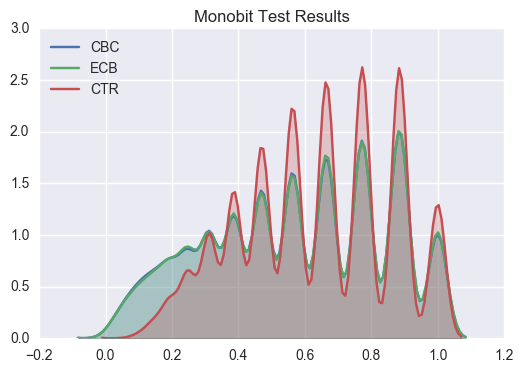

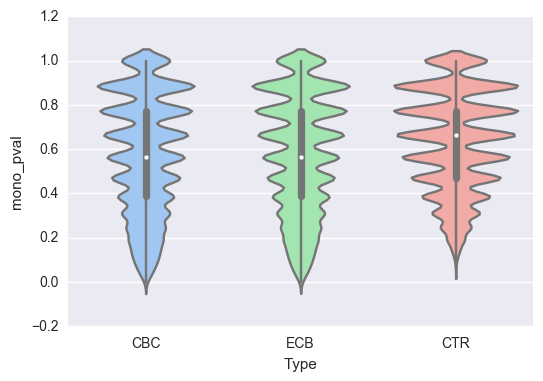

In [28]:
sns.kdeplot(CBC_df2.mono_pval, label="CBC", shade=True).set_title("Monobit Test Results")
sns.kdeplot(ECB_df2.mono_pval, label="ECB", shade=True)
sns.kdeplot(CTR_df2.mono_pval, label="CTR", shade=True)
plt.legend(bbox_to_anchor=(0.2,1))
plt.show()

sns.violinplot(x='Type', y='mono_pval', data=mono_test, palette='pastel')
plt.show()

#### Frequency Test within a Block

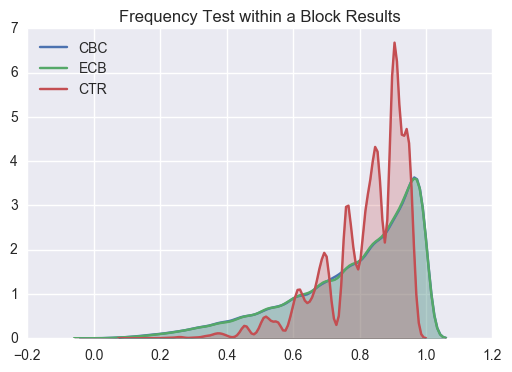

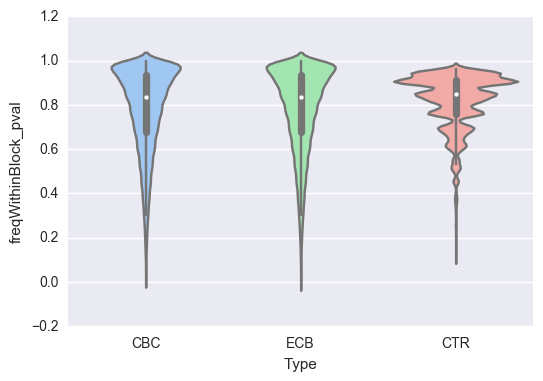

In [29]:
sns.kdeplot(CBC_df2.freqWithinBlock_pval, label="CBC", shade=True).set_title("Frequency Test within a Block Results")
sns.kdeplot(ECB_df2.freqWithinBlock_pval, label="ECB", shade=True)
sns.kdeplot(CTR_df2.freqWithinBlock_pval, label="CTR", shade=True)
plt.legend(bbox_to_anchor=(0.2,1));
plt.show()

sns.violinplot(x='Type', y='freqWithinBlock_pval', data=freqWithinBlock_test, palette='pastel')
plt.show()

### Perform ANOVA
In this section, we statistically compare the p-value results of each NIST test by AES encryption type.

#### Monobit Test

In [30]:
mod = ols('mono_pval ~ Type',
                data=mono_test).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                sum_sq        df            F  PR(>F)
Type        212.422136       2.0  1672.918385     0.0
Residual  19046.357543  299997.0          NaN     NaN


Calculating eta value below

In [31]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

0.01102988554228162

Perform TukeyHSD post-hoc test

***Note that for monobit, CTR stands out as being statistically different from CBC and ECB***

In [32]:
mc = multi.MultiComparison(mono_test.mono_pval, mono_test.Type)
res = mc.tukeyhsd()
print(res)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 CBC    CTR    0.0572   0.0545 0.0598  True 
 CBC    ECB    0.0015  -0.0011 0.0041 False 
 CTR    ECB   -0.0557  -0.0583 -0.053  True 
--------------------------------------------


### Final aggregations of passing vs. failing ciphertexts

In this section, we provide the final aggregated results of passing vs. failing counts among the three AES encryption types. These final counts are based on the number of passing vs. failing tests for each ciphertext.

***I still need to add basic code for this section, but it will simply tally the number of passing vs. failing ciphertexts for CBC, ECB, and CTR***